In [1]:
from IPython.display import Image

# Global population layers

In this tutorial we are going to get started working with global population data. 

The benefit of using such data is the ability to flexibly analyze lots of different contexts, and generally have a consistent method (along with estimated values) across countries.



# WorldPop

Population data are essential to support the operations of businesses and governments, especially at the subnational scale.

Traditional national data may not be detailed enough to undertake targeted interventions, therefore raising the need for local and regional insight. 

Indeed, the global population is currently growing by over 80 million people a year, and 35-40 million people migrating every 5 years. 

Keeping track of where this is happening can be challenging, especially for low- and middle-income countries that have fewer resources, are afflicted by conflict, or have to work in challenging terrain. 

WorldPop provides almost 45,000 datasets, complementing traditional population sources with dynamic, high-resolution data for mapping human population distributions, with the ultimate goal of ensuring that everyone, everywhere is counted in decision making.

https://www.worldpop.org/


### Lots of data 

Worldpop will provide many different types of data layers for you to choose from.

For now we will focus purely on population counts, but you can also explore the many other types of data available:

https://www.worldpop.org/datacatalog/

Using counts will merely estimate that x population live in y tile. However, other datasets can break down down in much more detail, e.g., using the age and sex estimates (which you can choose to work with later if you desire).

## Population counts: Constrained vs Unconstrained

Population and housing censuses remain the most important resource for production of accurate population data at national and subnational scales.

However, they may only be made available as counts per administrative unit. This can mask small area variations and being challenging to integrate with other datasets. 

WorldPop top-down modeling methods take a global database of administrative unit-based census and projection counts for each year 2000-2020 and utilize a set of detailed geospatial datasets to disaggregate them to grid cell-based counts. 

Two methods have been adopted to produce these over multiple countries using Random Forests machine learning methods. 

Firstly, estimation over all land grid squares globally (unconstrained)


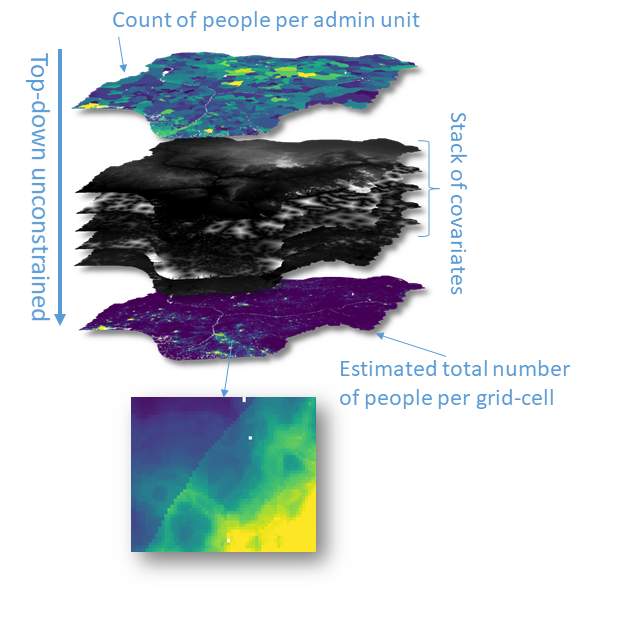

In [2]:
Image("images/top_down_unconstrained_v1.png")

Secondly, estimation only within areas mapped as containing built settlements (constrained). 

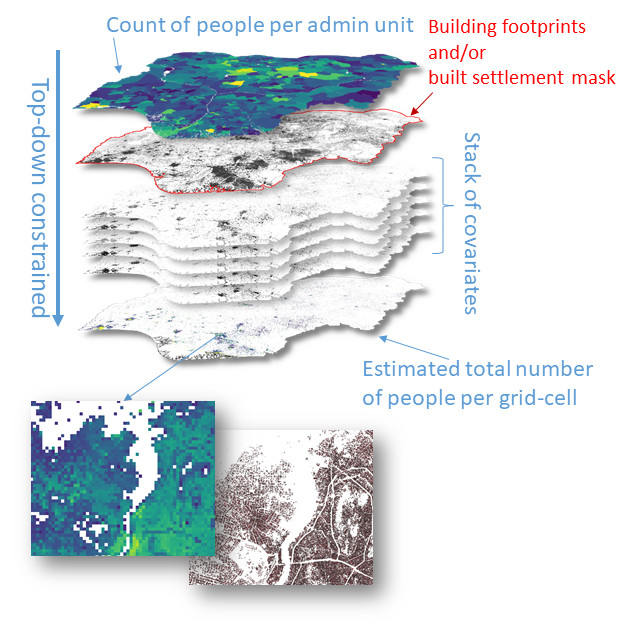

In [3]:
Image("images/top_down_constrained_v1.png")


Recent comparisons of constrained vs unconstrained top-down mapping across multiple countries find only limited differences in the accuracy of national maps produced by each method, but variations by country can be seen. It is important to be aware of differences, however. 

For an appropriate data source in this class, it is recommended to access the unconstrained global mosaics 2000-2020, and then select a recent layer (e.g., 2020) for download: 

https://hub.worldpop.org/geodata/listing?id=64
    
The layer should represent the estimated total number of people per grid-cell, with the dataset available to download in Geotiff format at a resolution of 30 arc (approximately 1km at the equator), in the WGS84 Geographic Coordinate System. 

Each pixel represents number of people in that tile. The mapping approach is Random Forest-based dasymetric redistribution. 
        
https://hub.worldpop.org/geodata/summary?id=24777

You should end up with a file named `ppp_2020_1km_Aggregated.tif.aux`. Place it in your `global_assessment/data/raw` folder, in a directory named `worldpop`.




# What is a raster?

Now we have downloaded our population data layer, we want to open and begin working with this information. This requires us to access the raster format our data are in.

Importantly, raster layers are based on a two-dimensional image represented by a rectangular matrix (thus, a grid of square pixels).

See here for more information: https://en.wikipedia.org/wiki/Raster_graphics

These graphics can then be interpreted by a computer to display the underlaying data as an image.

It is important to know the difference between vector and raster graphics. Let us watch the following short video to clarify the difference.

In [4]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/-Fs2t6P5AjY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# Rasterio: Working with rasters in python

To interpret our data we can use rasterio to both read and write geospatial raster data.

You can think of rasterio as standing for "RASTER Input-Output".

The GeoTIFF standard (and other raster formats) are common for geographic information systems to organize and store gridded, or raster, datasets. We are able to use rasterio to read and write these formats and then provide a Python API based on N-D arrays.

An `ndarray` is a (usually fixed-size) multidimensional container of items of the same type and size. Numpy uses N-D arrays as its basic data structure. Rasterio heavily uses numpy in its operations.

You can see the GitHub code here: https://github.com/rasterio/rasterio

Or, more usefully, you can access the rasterio documentation here: https://rasterio.readthedocs.io/en/latest/


# Loading in raster data
First, we will need to install rasterio into our virtual conda environment.

In [5]:
# Example
# If you do not already have rasterio installed:
import sys
!conda install --yes --prefix {sys.prefix} rasterio

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




Load in the `rasterio` package:

In [6]:
# Example
import os
import pandas as pd
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats

And, now we can specify our filename. 

In [7]:
# Example
filename = "ppp_2020_1km_Aggregated.tif"
filename

'ppp_2020_1km_Aggregated.tif'

And allocate the folder path:

In [8]:
# Example
folder = os.path.join('..', 'data', 'raw', 'worldpop')
folder

'..\\data\\raw\\worldpop'

Then we can define our path:

In [9]:
# Example
path_population = os.path.join(folder, filename)
path_population

'..\\data\\raw\\worldpop\\ppp_2020_1km_Aggregated.tif'

And finally we can load our layer to a `rasterio` object:

In [10]:
my_raster_image = rasterio.open(path_population)
my_raster_image

<open DatasetReader name='..\data\raw\worldpop\ppp_2020_1km_Aggregated.tif' mode='r'>

We can now see that we have our rasterio object created, and therefore we have access to the Python API interface for this .tif file based on Numpy N-dimensional arrays.

In [11]:
# Example
data = my_raster_image.read(1)
print(data) #this might take a while, as it is loading the whole world!

[[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 ...
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]]


# Loading in a boundary

In order for us to query our raster layer, we need to have a boundary. 


In [12]:
# Example
filename = 'gadm41_RWA_0.shp'
path_boundary = os.path.join('..', 'data', filename)
print(path_boundary)

..\data\gadm41_RWA_0.shp


Now we can load in our boundaries:

In [13]:
# Example
boundaries = gpd.read_file(path_boundary, crs='epsg:4326')
boundaries

,GID_0,COUNTRY,geometry
0,RWA,Rwanda,"POLYGON ((29.71332 -2.81759, 29.71295 -2.81774..."


And we can subset our boundaries using a simple `pandas` function:

In [14]:
boundary = boundaries[boundaries['GID_0'] == 'RWA']
boundary

,GID_0,COUNTRY,geometry
0,RWA,Rwanda,"POLYGON ((29.71332 -2.81759, 29.71295 -2.81774..."


Now we know both our data layers are working properly, as we have loaded them and checked their contents.

Let us specify the full code for querying this .tif population layer for our chosen boundary. We are going to use `with`, rather than the generic `open()`, as it provides us with cleaner functionality, ensuring resources are closed right after using/processing.

This function will involve:

    - opening the raster data by providing the path
    - loading the affine transformation (geometric transformation information)
    - loading our population data layer from the rasterio object ('src')
    - removing negative numbers
    - querying the underlying data using the `zonal_stats` function
    - printing our result



In [15]:
# Example
with rasterio.open(path_population) as src:

    affine = src.transform                       #here we load the affine function 
    array = src.read(1)                          #here we load our actual data from layer 1
    array[array <= 0] = 0                        #here we get rid of negative number 

    population = [i['sum'] for i in zonal_stats( #now we sum all cells within our zonal boundary 
        boundary['geometry'],   #<- providing our boundary
        array,                  #<- providing our .tif raster data 
        nodata=255,             #<- stating the value that cells with no data will have
        stats=['sum'],          #<- stating what statistics we want
        affine=affine)][0]      #<- providing the affine function to convert between coordinate systems
    
    #now let's print the sum of the population in our area!
    print(round(population))

13510832


# Exercise 1

As an easy way to get into this processing, please download the country boundary data from gadm for a country of your choice, and estimate the population. 

Have a go at entering your code below in a single cell.

You will each be asked to share your screen and explain your code, and the estimate you have produced, at the end of the exercise. 

The steps:

    - collate your code to load the population layer. 
    - download your gadm country boundary and put in the `data/raw` folder. 
    - load your gadm country boundary.
    - execute the query function to get the population estimate. 
    - print the results
    

# Exercise 2

Reusing much of your existing code, download the level 1 regions for your chosen country.

If your country is large, subset so you only have 5 regions. 

Loop over your regions, and print out the population for each layer. 

The steps:

    - collate your code to load the population layer. 
    - download your gadm level 1 boundaries and put in the `data/raw` folder. 
    - load your gadm regional boundaries.
    - iterate over each row of your boundaries
    - pass each boundary to the query function to get the population estimate. 
    - print the results
    
You will each be asked to share your screen and explain your code, and the estimate you have produced, at the end of the exercise.

# Exercise 3

Reusing much of your existing code, instead of printing the output, try save it to a dictionary, and append to a list. You can then convert this data to a pandas dataframe, and export it as a .csv file. 

You will each be asked to share your screen and explain your code, and the estimate you have produced, at the end of the exercise.

# Exercise 4

Subset your country regions from the global boundaries layers.

Export the results to a .csv file. 

You will each be asked to share your screen and explain your code, and the estimate you have produced, at the end of the exercise.